## University of Nicosia ##
## COMP-548DL ##
### Big Data Management and Processing
### Markos Charalampous
### Udemy Courses Analytics

Udemy, Inc. is a global destination platform for teaching and learning online with more than 57 million students, 213,000 courses, and 74,000 instructors teaching courses in over 75 languages.
For this project, 2 datasets were used. The first file('Course_info.csv') contains basic information about 210k courses, while the second one('Comments.csv') contains more than 9M comments for these courses.

Please use the [Udemy Kaggle link](https://www.kaggle.com/datasets/hossaingh/udemy-courses) for more details on the dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize

### Load Courses Dataset

In [2]:
# load courses dataset into a dataframe
df_courses = pd.read_csv('Course_info.csv')

### Courses General Information

In [3]:
df_courses.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [4]:
df_courses.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [5]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

### Courses Data Preprocessing
We start by checking for missing in our dataset. We see that there are some None in four columns, but we won't need to do anything about it since they are columns that we are not going to use. Further, we check and confirm that each row corresponds to a unique course and then convert the type of date columns to 'datetime'.

In [6]:
# check for missing values
df_courses.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [7]:
df_courses.shape

(209734, 20)

In [8]:
# check for unique values in id column
df_courses['id'].nunique()

209734

In [9]:
# convert date columns types from object to datetime
df_courses['published_time'] = pd.to_datetime(df_courses['published_time'])
df_courses['last_update_date'] = pd.to_datetime(df_courses['last_update_date'])

In [10]:
print(df_courses['published_time'].min())
print(df_courses['published_time'].max())

2010-01-12 18:09:46+00:00
2022-10-05 17:04:08+00:00


### Load Comments Dataset

In [11]:
# load comments dataset into a dataframe
df_comments = pd.read_csv('Comments.csv')

### Comments General Information

In [12]:
df_comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


In [13]:
df_comments.describe()

,id,course_id,rate
count,9.411727e+06,9.411727e+06,9.411727e+06
mean,5.625454e+07,1.589933e+06,4.508870e+00
std,3.754655e+07,1.100059e+06,8.587239e-01
min,5.400000e+01,1.769000e+03,5.000000e-01
25%,2.256843e+07,7.641640e+05,4.000000e+00
50%,5.296542e+07,1.333640e+06,5.000000e+00
75%,8.625520e+07,2.243978e+06,5.000000e+00
max,1.267091e+08,4.913148e+06,5.000000e+00


In [14]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411727 entries, 0 to 9411726
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   course_id     int64  
 2   rate          float64
 3   date          object 
 4   display_name  object 
 5   comment       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.8+ MB


### Comments Data Preprocessing
As before, we check for missing values in the comments dataset. This time, however, we choose to completely delete from our dataset the rows that have missing values, since it is a very small percentage and it will not affect our results. In addition, we create a new column for the year that we will use later for the graphics.

In [15]:
# check for missing values
df_comments.isna().sum()

id                  0
course_id           0
rate                0
date                0
display_name    75362
comment          6333
dtype: int64

In [16]:
df_comments.shape

(9411727, 6)

In [17]:
# remove rows with missing values
df_comments = df_comments.dropna(axis=0).reset_index(drop=True)
df_comments.shape

(9330843, 6)

In [18]:
# Creating new columns for year based on date column
df_comments['date_year'] = pd.to_datetime(df_comments['date'].str[0:10])
df_comments['date_year'] = df_comments['date_year'].dt.year

### Data Analysis and Visualization for both datasets
To understand the data and draw conclusions, we created graphical representations to answer the following questions:
- What percentage of courses are free and paid?
- What are the courses with the most subscribers?
- What are the most popular course languages?
- What are the categories with the most courses and which categories are chosen by students the most?
- How much have the numbers of courses and students changed in recent years?

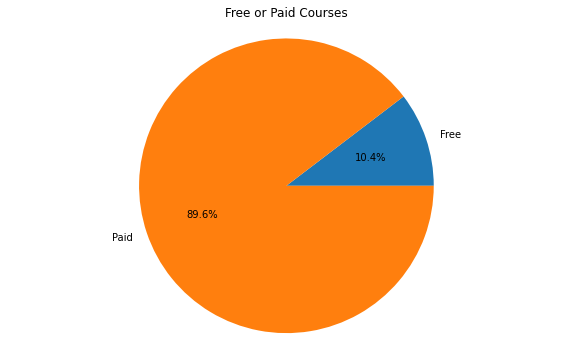

In [19]:
# create a plot for Free or Paid Courses percentages
plt.figure(figsize = (10, 6))
plt.pie(df_courses.groupby(['is_paid']).size(), labels = ['Free', 'Paid'], autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Free or Paid Courses")
plt.show()

Text(0.5, 1.0, 'Distribution of the price for all courses')

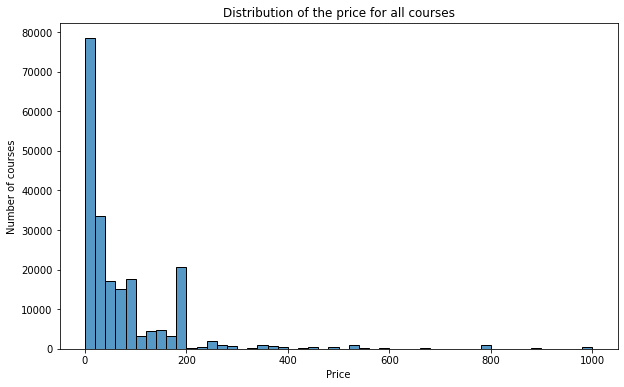

In [20]:
# Create a plot for the Distribution of price of courses
plt.subplots(figsize=(10,6))
sns.histplot(data=df_courses, x='price', bins=50)
plt.xlabel("Price")
plt.ylabel("Number of courses")
plt.title("Distribution of the price for all courses")

In [21]:
# create new dataframe with the top 10 Languages with the most courses
df_lang = df_courses.groupby(['language']).size().reset_index(name = 'count').sort_values(
    by = 'count', ascending = False).head(10)
df_lang

,language,count
15,English,123921
52,Portuguese,18471
62,Spanish,17428
71,Turkish,8100
34,Japanese,7006
23,German,6101
20,French,5465
2,Arabic,5197
33,Italian,3637
56,Russian,2686


Text(0.5, 1.0, 'Number of courses per language(top 10)')

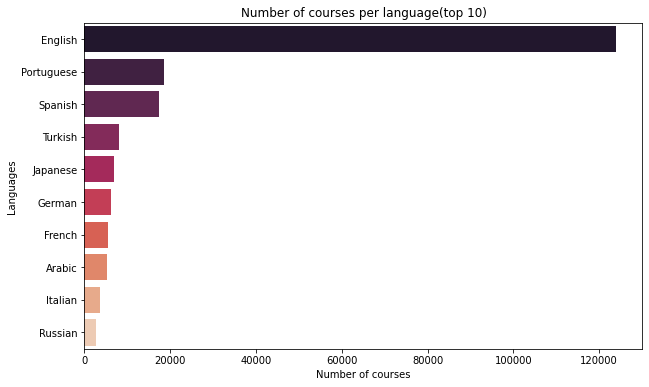

In [22]:
# create a plot to show the Number of courses per language(top 10)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_lang, x='count', y='language', palette='rocket')
plt.xlabel("Number of courses")
plt.ylabel("Languages")
plt.title("Number of courses per language(top 10)")

In [23]:
# create a new dataframe with the top 10 courses with the most subscribers
top_sub_courses = df_courses[['title', 'num_subscribers', 'avg_rating']].sort_values(by = 'num_subscribers', ascending = False).head(10)
top_sub_courses['num_subscribers'] = top_sub_courses['num_subscribers'].astype(int)
top_sub_courses

,title,num_subscribers,avg_rating
396,Java Tutorial for Complete Beginners,1752364,4.444383
10724,2022 Complete Python Bootcamp From Zero to Her...,1612862,4.611872
16288,Microsoft Excel - Excel from Beginner to Advanced,1108811,4.689838
10174,Automate the Boring Stuff with Python Programming,1056369,4.676586
20252,Machine Learning A-Z™: Hands-On Python & R In ...,896340,4.569116
12120,The Web Developer Bootcamp 2022,823805,4.708899
7802,Introduction To Python Programming,783638,4.437906
39113,The Complete 2022 Web Development Bootcamp,771176,4.698089
9965,Java Programming Masterclass covering Java 11 ...,720304,4.511519
19303,The Complete Digital Marketing Course - 12 Cou...,706339,4.510407


Text(0.5, 1.0, 'Number of subscribers per course(top 10)')

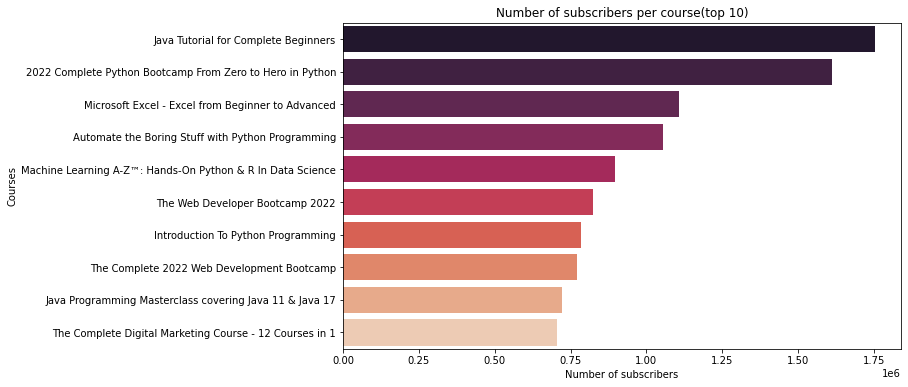

In [24]:
# create a plot to show the Number of subscribers per course(top 10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sub_courses, x='num_subscribers', y='title', palette='rocket')
plt.xlabel("Number of subscribers")
plt.ylabel("Courses")
plt.title("Number of subscribers per course(top 10)")

In [25]:
# check how many unique categories there are
df_courses['category'].nunique()

13

In [26]:
# create new dataframe with the total subs per category
df_categ = df_courses.groupby('category')['num_subscribers'].sum().reset_index(name = 'total subs').sort_values(
    by = 'total subs', ascending = False)
df_categ

,category,total subs
2,Development,213749682.0
5,IT & Software,106772852.0
0,Business,70012074.0
1,Design,47989137.0
7,Marketing,40803010.0
12,Teaching & Academics,38302240.0
10,Personal Development,37214172.0
9,Office Productivity,27613503.0
3,Finance & Accounting,23822748.0
11,Photography & Video,13720894.0


Text(0.5, 1.0, 'Number of subscribers per Category')

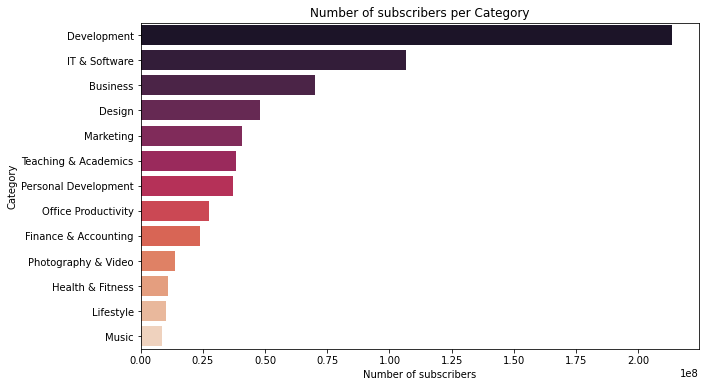

In [27]:
# create a plot to show the Total Number of subscribers per category
plt.figure(figsize=(10, 6))
sns.barplot(data=df_categ, x='total subs', y='category', palette='rocket')
plt.xlabel("Number of subscribers")
plt.ylabel("Category")
plt.title("Number of subscribers per Category")

Text(0.5, 1.0, 'Number of courses per category')

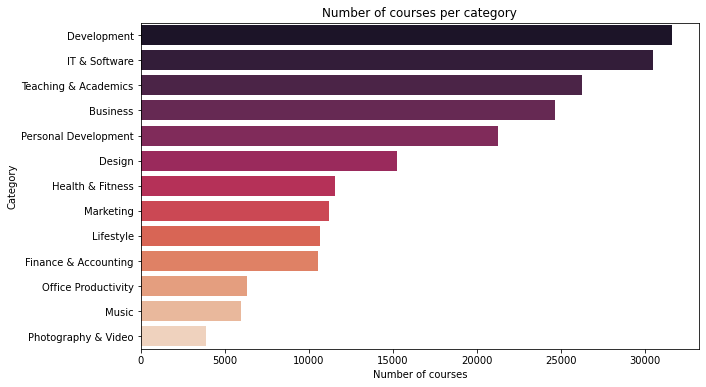

In [28]:
# create a plot to show the Number of courses per category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_courses, y='category', order=df_courses['category'].value_counts().sort_values(ascending=False).index, palette='rocket')
plt.xlabel("Number of courses")
plt.ylabel("Category")
plt.title("Number of courses per category")

Text(0.5, 1.0, 'Number of courses published per year')

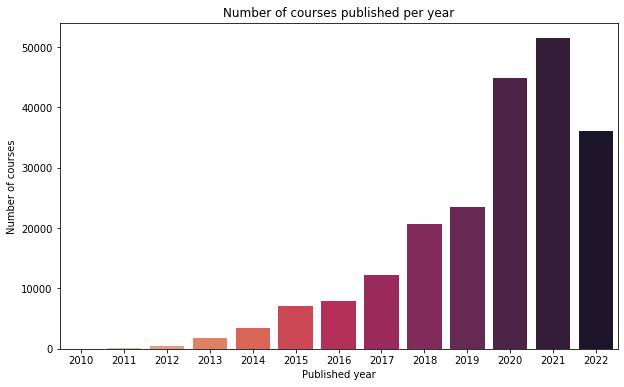

In [29]:
# create year column from published time column
df_courses['published_year'] = df_courses['published_time'].dt.year

# Group the year column and count the number of courses per year
df_year = df_courses.groupby(['published_year']).size().reset_index(name = 'count')

# create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, y='count', x='published_year', palette='rocket_r')
plt.xlabel("Published year")
plt.ylabel("Number of courses")
plt.title("Number of courses published per year")

In [30]:
df_year

,published_year,count
0,2010,4
1,2011,57
2,2012,464
3,2013,1778
4,2014,3404
5,2015,7102
6,2016,7975
7,2017,12258
8,2018,20653
9,2019,23529


Text(0.5, 1.0, 'Number of comments posted per year')

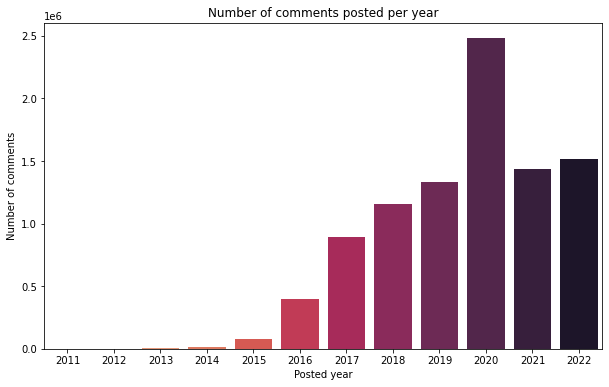

In [31]:
# Group the year column and count the number of comments per year
df_comments_year = df_comments.groupby(['date_year']).size().reset_index(name = 'count')

# create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comments_year, y='count', x='date_year', palette='rocket_r')
plt.xlabel("Posted year")
plt.ylabel("Number of comments")
plt.title("Number of comments posted per year")